In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
G = nx.karate_club_graph()

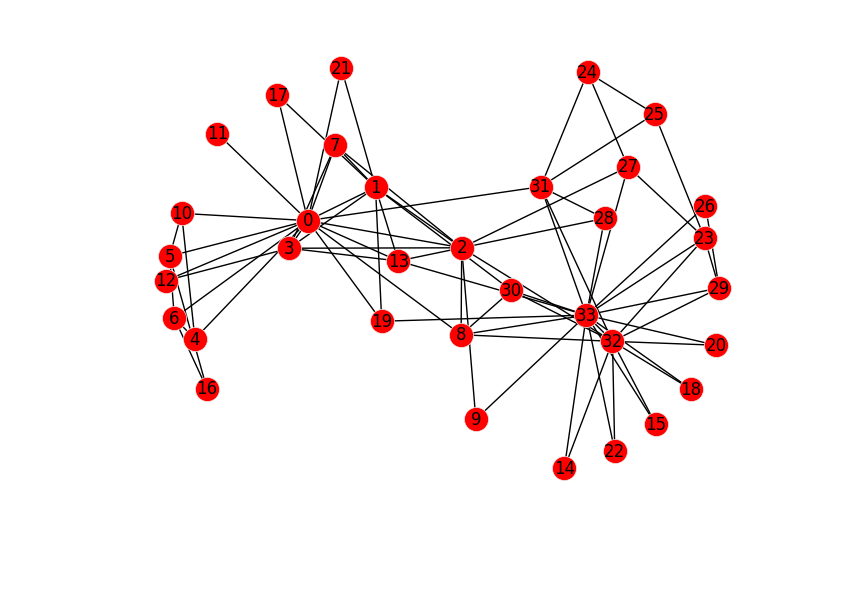

In [3]:
pos=nx.spring_layout(G)
plt.figure(figsize=(10,7))
plt.axis('off')
nx.draw_networkx(G, pos)

In [4]:
nx.core_number(G)

{0: 4,
 1: 4,
 2: 4,
 3: 4,
 4: 3,
 5: 3,
 6: 3,
 7: 4,
 8: 4,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 4,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 3,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

In [5]:
G.degree()

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

(array([  1.,   0.,   0.,  11.,   0.,   0.,  12.,   0.,   0.,  10.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

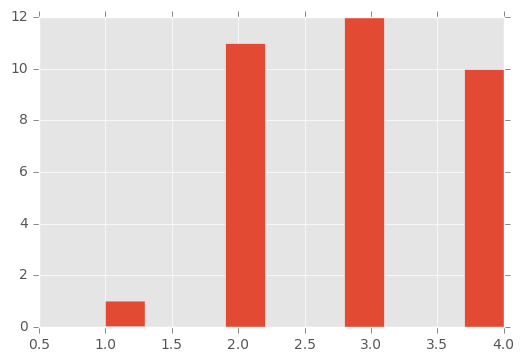

In [6]:
plt.hist(nx.core_number(G).values())

(array([ 12.,  12.,   3.,   2.,   0.,   2.,   1.,   0.,   0.,   2.]),
 array([  1. ,   2.6,   4.2,   5.8,   7.4,   9. ,  10.6,  12.2,  13.8,
         15.4,  17. ]),
 <a list of 10 Patch objects>)

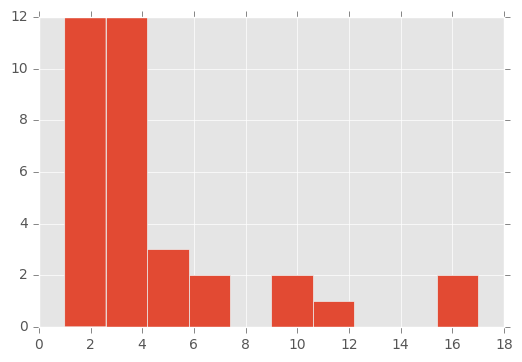

In [7]:
plt.hist(G.degree().values())

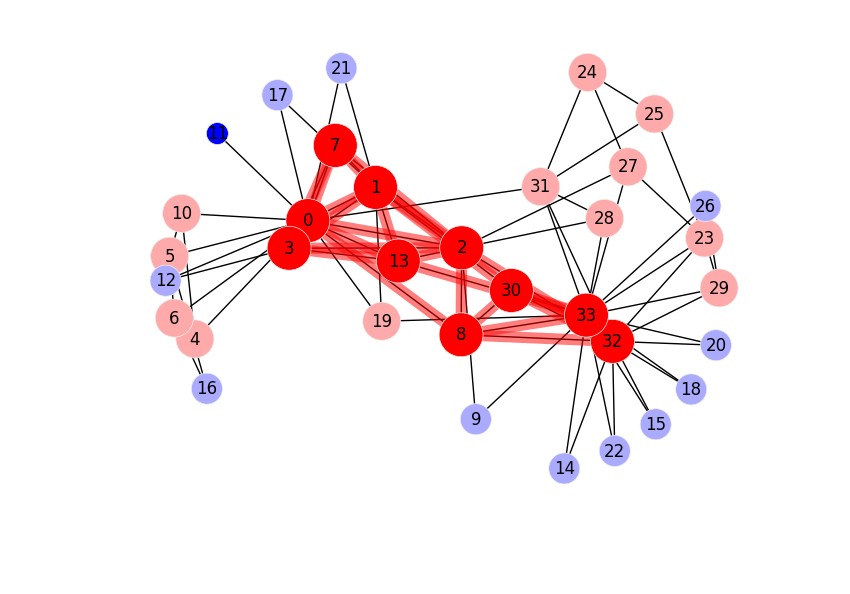

In [8]:
plt.figure(figsize=(10,7))
plt.axis('off')
nodesize = [v * 250 for v in nx.core_number(G).values()]
nx.draw_networkx(G, pos, 
                 with_labels = True,
                 node_list = nx.core_number(G).keys(), 
                 node_color = nx.core_number(G).values(),
                 node_size=nodesize,
                 cmap=plt.cm.bwr)

nx.draw_networkx_edges(nx.k_core(G,4),pos,
                       nx.k_core(G,4).edges(),
                       width=8,alpha=0.5,edge_color='r')

plt.show()

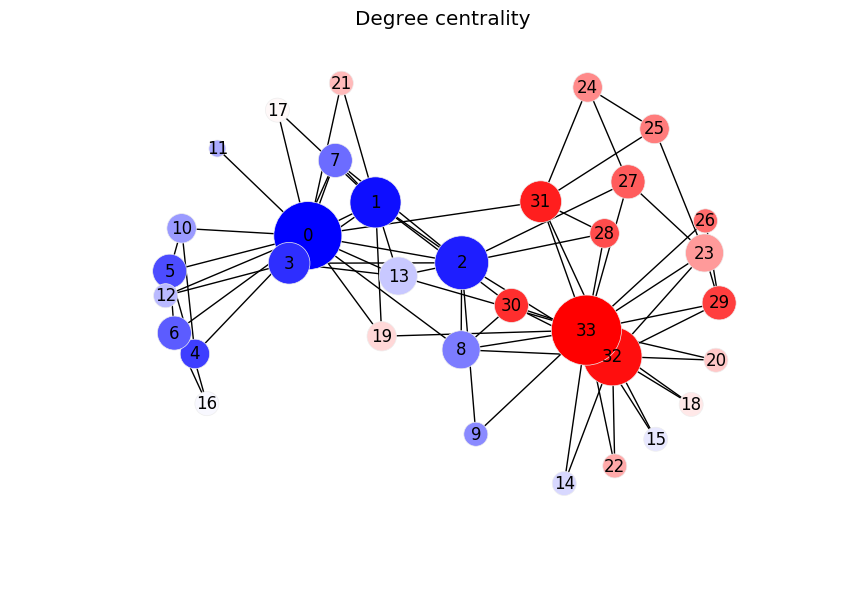

In [9]:
deg = nx.degree(G)
plt.figure(figsize=(10,7))
plt.axis('off')
plt.title('Degree centrality')
nodesize = [v * 150 for v in deg.values()]
nx.draw_networkx(G, nodelist=deg.keys(), pos=pos, node_color=range(len(G)), node_size=nodesize, cmap=plt.cm.bwr)
plt.show()

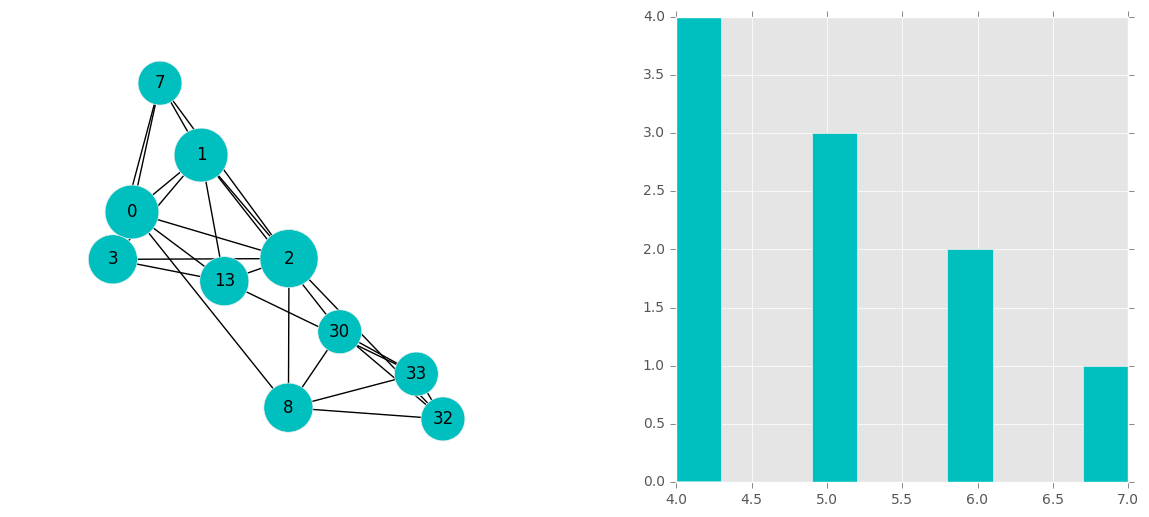

In [10]:
core = nx.k_core(G,4)
nodesize = [v * 250 for v in nx.degree(core).values()]
plt.figure(figsize=(14,6))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(121)
plt.axis('off')
nx.draw_networkx(core,pos=pos,node_size=nodesize,node_color='c')
plt.subplot(122)
plt.hist(core.degree().values(),color='c')
plt.show()

**maximal clique** is a clique that cannot be extended by including one more adjacent vertex (not included in larger one)

**maximum clique** is a clique of the largest possible size in a given graph

In [11]:
list(nx.enumerate_all_cliques(core)) # all cliques

[[0],
 [1],
 [2],
 [3],
 [32],
 [33],
 [8],
 [7],
 [13],
 [30],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 8],
 [0, 7],
 [0, 13],
 [1, 2],
 [1, 3],
 [1, 7],
 [1, 13],
 [1, 30],
 [2, 3],
 [2, 32],
 [2, 8],
 [2, 7],
 [2, 13],
 [3, 7],
 [3, 13],
 [32, 33],
 [32, 8],
 [32, 30],
 [33, 8],
 [33, 13],
 [33, 30],
 [8, 30],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 7],
 [0, 1, 13],
 [0, 2, 3],
 [0, 2, 8],
 [0, 2, 7],
 [0, 2, 13],
 [0, 3, 7],
 [0, 3, 13],
 [1, 2, 3],
 [1, 2, 7],
 [1, 2, 13],
 [1, 3, 7],
 [1, 3, 13],
 [2, 3, 7],
 [2, 3, 13],
 [2, 32, 8],
 [32, 33, 8],
 [32, 33, 30],
 [32, 8, 30],
 [33, 8, 30],
 [0, 1, 2, 3],
 [0, 1, 2, 7],
 [0, 1, 2, 13],
 [0, 1, 3, 7],
 [0, 1, 3, 13],
 [0, 2, 3, 7],
 [0, 2, 3, 13],
 [1, 2, 3, 7],
 [1, 2, 3, 13],
 [32, 33, 8, 30],
 [0, 1, 2, 3, 7],
 [0, 1, 2, 3, 13]]

In [12]:
list(nx.find_cliques(core)) # all maximal cliques 

[[33, 32, 8, 30],
 [33, 13],
 [2, 0, 8],
 [2, 0, 1, 3, 13],
 [2, 0, 1, 3, 7],
 [2, 32, 8],
 [30, 1]]

In [13]:
nx.graph_clique_number(core) # size of largest clique

5

In [14]:
nx.graph_number_of_cliques(core) # number of maximal cliques

7

In [15]:
list(nx.k_clique_communities(G, 4))

[frozenset({0, 1, 2, 3, 7, 13}),
 frozenset({23, 29, 32, 33}),
 frozenset({8, 30, 32, 33})]

In [16]:
core.nodes()

[0, 1, 2, 3, 32, 33, 8, 7, 13, 30]